<a href="https://colab.research.google.com/github/ayan3b/DATASET/blob/main/Adult_xgboost_target_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the basic library for EDA

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Reading the processed Adult data file where only ategorical variable not encoded

df = pd.read_csv('https://raw.githubusercontent.com/ayan3b/DATASET/main/ADULT/Adult_without_encoder_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        32537 non-null  int64  
 1   age               32537 non-null  int64  
 2   workclass         32537 non-null  object 
 3   fnlwgt            32537 non-null  int64  
 4   education         32537 non-null  object 
 5   education-num     32537 non-null  int64  
 6   marital-status    32537 non-null  object 
 7   occupation        32537 non-null  object 
 8   relationship      32537 non-null  object 
 9   race              32537 non-null  object 
 10  sex               32537 non-null  object 
 11  capital-gain      32537 non-null  int64  
 12  capital-loss      32537 non-null  int64  
 13  hours-per-week    32537 non-null  int64  
 14  native-country    32537 non-null  object 
 15  income            32537 non-null  object 
 16  income_binary     32537 non-null  int64 

In [4]:
df.head()


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,hours-per-week,native-country,income,income_binary,age_s,fnlwgt_s,education_num_s,capital_gain_s,capital_loss_s,hours_per_week_s
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,40,United-States,<=50K,0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,13,United-States,<=50K,0,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,40,United-States,<=50K,0,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,40,United-States,<=50K,0,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,40,Cuba,<=50K,0,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664


In [5]:
# Checking the null value presence
df.isnull().sum()

Unnamed: 0          0
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
income_binary       0
age_s               0
fnlwgt_s            0
education_num_s     0
capital_gain_s      0
capital_loss_s      0
hours_per_week_s    0
dtype: int64

In [6]:
# Ordinal encoding o education object
def education_ordinal_encoding(val):
  if val == 'Preschool':
    return 1
  elif val == 'School':
    return 2
  elif val == 'HS-grad':
    return 3
  elif val == 'AssociateLevel':
    return 4
  elif val == 'Bachelors':
    return 5
  elif val == 'Masters':
    return 6
  elif val == 'Prof-school':
    return 7
  elif val == 'Doctorate':
    return 8
  else :
    return 0

In [7]:
df['education_e'] = df.education.apply(lambda x : education_ordinal_encoding(x))

df[['education','education_e']].head()

,education,education_e
0,Bachelors,5
1,Bachelors,5
2,HS-grad,3
3,HS-grad,3
4,Bachelors,5


## encoding on the categorical attributes One Hot encoding

In [8]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [9]:
from sklearn.preprocessing import TargetEncoder

In [10]:
# Selecting the columns to be target encoded
columns_to_encode = ['workclass', 'occupation','relationship','marital-status','race','sex']

# Creating an instance of OneHotEncoder
encoder = TargetEncoder()

# Fit and transform the selected categorical columns
encoded_columns = encoder.fit_transform(df[columns_to_encode], df['income_binary'])

# Creating a DataFrame from the encoded columns
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

#renaming of the column names of encoded dataframe
df_encoded.rename(
    columns={'workclass': 'workclass_e', 'occupation': 'occupation_e', 'relationship': 'relationship_e', 'marital-status': 'marital-status_e', 'race': 'race_e', 'sex': 'sex_e' },
    inplace=True,
)

# Concatenating the encoded DataFrame with the original DataFrame, dropping the original categorical columns
#df = pd.concat([df, df_encoded], axis=1).drop(columns=columns_to_encode)

df_encoded_for_xgboost = pd.concat([df, df_encoded], axis=1)

# Display the updated DataFrame
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,capital_gain_s,capital_loss_s,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0.148292,-0.216743,-0.035664,5,0.267281,0.132312,0.102474,0.045663,0.255196,0.305956
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,-0.145975,-0.216743,-2.222483,5,0.285343,0.485953,0.448063,0.447095,0.256096,0.304890
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,-0.145975,-0.216743,-0.035664,3,0.219555,0.062380,0.104762,0.104455,0.256766,0.306937
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,-0.145975,-0.216743,-0.035664,3,0.219327,0.065093,0.447891,0.446365,0.129679,0.305956
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,-0.145975,-0.216743,-0.035664,5,0.217637,0.445801,0.464356,0.446483,0.122510,0.109485


In [11]:
df_encoded_for_xgboost.groupby(['sex_e']).agg({'income' : 'count'})


,income
sex_e,
0.108372,2189
0.108633,2182
0.109485,2194
0.110011,2035
0.111287,2162
0.304890,4346
0.305419,4314
0.305956,4325
0.306062,4318


In [12]:
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,capital_gain_s,capital_loss_s,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0.148292,-0.216743,-0.035664,5,0.267281,0.132312,0.102474,0.045663,0.255196,0.305956
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,-0.145975,-0.216743,-2.222483,5,0.285343,0.485953,0.448063,0.447095,0.256096,0.304890
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,-0.145975,-0.216743,-0.035664,3,0.219555,0.062380,0.104762,0.104455,0.256766,0.306937
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,-0.145975,-0.216743,-0.035664,3,0.219327,0.065093,0.447891,0.446365,0.129679,0.305956
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,-0.145975,-0.216743,-0.035664,5,0.217637,0.445801,0.464356,0.446483,0.122510,0.109485


In [13]:
df_encoded_for_xgboost.isnull().sum().sort_values(ascending=False)

Unnamed: 0          0
age                 0
race_e              0
marital-status_e    0
relationship_e      0
occupation_e        0
workclass_e         0
education_e         0
hours_per_week_s    0
capital_loss_s      0
capital_gain_s      0
education_num_s     0
fnlwgt_s            0
age_s               0
income_binary       0
income              0
native-country      0
hours-per-week      0
capital-loss        0
capital-gain        0
sex                 0
race                0
relationship        0
occupation          0
marital-status      0
education-num       0
education           0
fnlwgt              0
workclass           0
sex_e               0
dtype: int64

In [14]:
df_encoded_for_xgboost.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_binary', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_e', 'occupation_e',
       'relationship_e', 'marital-status_e', 'race_e', 'sex_e'],
      dtype='object')

In [15]:
list_of_x_column = ['age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_e', 'occupation_e',
       'relationship_e', 'marital-status_e', 'race_e', 'sex_e']

In [16]:
y_column = ['income', 'income_binary']

##  XGBOOST Model Build

In [17]:
# target variable and input features has been splited into two different dataframe

col_list = [x for x in df_encoded_for_xgboost.columns if x != 'income_binary']
col_list


['Unnamed: 0',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'age_s',
 'fnlwgt_s',
 'education_num_s',
 'capital_gain_s',
 'capital_loss_s',
 'hours_per_week_s',
 'education_e',
 'workclass_e',
 'occupation_e',
 'relationship_e',
 'marital-status_e',
 'race_e',
 'sex_e']

In [18]:
X = df_encoded_for_xgboost[col_list]
y = df_encoded_for_xgboost['income_binary']

In [19]:
# Traiin test split of dataframe

from sklearn.model_selection import train_test_split

# Splitting data into train and test set 70:30
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [20]:
# Putting feature variables into X
X_train = X_train_split[list_of_x_column]
print("the shape of X_train datafrae :",X_train.shape)

X_test = X_test_split[list_of_x_column]
print("the shape of X_test datafrae :",X_test.shape)

# Putting target variable to y
y_train = y_train_split
print("the shape of y_train datafrae :",y_train.shape)

y_test = y_test_split
print("the shape of y_test datafrae :",y_test.shape)

the shape of X_train datafrae : (22775, 13)
the shape of X_test datafrae : (9762, 13)
the shape of y_train datafrae : (22775,)
the shape of y_test datafrae : (9762,)


In [21]:
# Importing XGBoost
from xgboost import XGBClassifier

# Importing libraries for cross validation- Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [22]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.4, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [23]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.622956,0.400536,0.036880,0.017449,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.920929,0.923508,0.923969,0.922802,0.001338,5,0.941916,0.940919,0.939767,0.940867,0.000878
1,0.933938,0.962923,0.043972,0.030265,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.924397,0.925580,0.928763,0.926247,0.001844,2,0.945211,0.945007,0.943267,0.944495,0.000872
2,4.014194,0.824798,0.088095,0.025502,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.925375,0.927245,0.929389,0.927336,0.001640,1,0.945696,0.945206,0.943927,0.944943,0.000745
3,2.599063,1.707070,0.027892,0.007863,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.916325,0.917950,0.918747,0.917674,0.001008,7,0.951653,0.949031,0.948958,0.949880,0.001253
4,1.366997,1.331232,0.033009,0.015760,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.921586,0.922191,0.925595,0.923124,0.001765,4,0.957668,0.956217,0.954999,0.956294,0.001091
5,0.221248,0.002561,0.022574,0.000229,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.924634,0.925551,0.928160,0.926115,0.001494,3,0.958465,0.957818,0.956712,0.957665,0.000724
6,0.249114,0.012412,0.023652,0.001461,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.901894,0.906443,0.907085,0.905141,0.002311,11,0.955725,0.953746,0.953552,0.954341,0.000982
7,0.238734,0.003097,0.027629,0.007447,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.914540,0.914550,0.914701,0.914597,0.000074,8,0.969780,0.967416,0.967634,0.968277,0.001067
8,0.229718,0.009127,0.022964,0.001010,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.916745,0.919703,0.922323,0.919590,0.002278,6,0.972703,0.971528,0.972022,0.972085,0.000482
9,0.250218,0.008008,0.022363,0.000254,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.884874,0.890969,0.893580,0.889807,0.003648,12,0.953652,0.949901,0.951149,0.951567,0.001560


In [24]:
model_cv.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [25]:
params = {'learning_rate': 0.1,
          'max_depth': 4,
          'n_estimators':150,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_lbl_encoder_model = XGBClassifier(params = params)
xgb_lbl_encoder_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [26]:
# Predictions on the train set
y_train_pred = xgb_lbl_encoder_model.predict(X_train)

In [27]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16679   614]
 [ 1233  4249]]


In [28]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [29]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9189023051591657
Sensitivity:- 0.7750820868296242
Specificity:- 0.9644943040536633
F1-Score:- 0.8214596423392944


In [30]:
# Predicted probability
y_train_pred_proba_xgb_lbl_encoder = xgb_lbl_encoder_model.predict_proba(X_train)[:,1]

In [31]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_xgb_lbl_encoder)
auc

0.9716250412736357

In [32]:
# ROC Curve function
import matplotlib.pyplot as plt

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

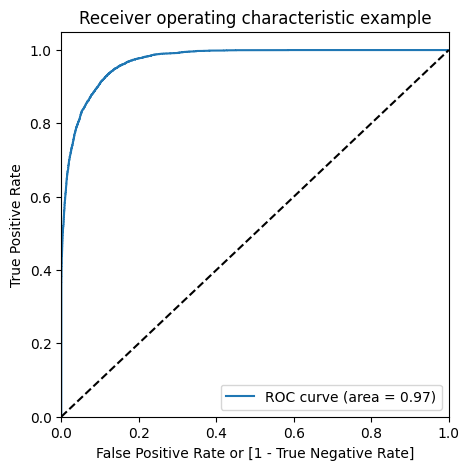

In [33]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb_lbl_encoder)

## Need to check along with accuracy what is fairness KPI says

In [34]:
# Predictions on the train set
y_test_pred = xgb_lbl_encoder_model.predict(X_test)

In [35]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6901  504]
 [ 829 1528]]


In [36]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [37]:
# Accuracy on the test dataset
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.8634501126818275
Sensitivity:- 0.6482817140432754
Specificity:- 0.9319378798109386
F1-Score:- 0.6962861699703804


training data have F1 score 80% but on the test data F1 score dropped to 70%

In [38]:
df_measure_fair = pd.concat([X_test_split, y_test], axis=1)

df_measure_fair = df_measure_fair.reset_index(drop=True)
df_measure_fair.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,capital_loss_s,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e,income_binary
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,-0.216743,-0.035664,4,0.274722,0.229367,0.448712,0.446748,0.255627,0.306062,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.216743,-0.035664,5,0.388856,0.478617,0.103422,0.045171,0.255627,0.306062,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,-0.216743,1.584202,5,0.297372,0.040676,0.447891,0.446365,0.210749,0.305956,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,-0.216743,-0.035664,5,0.219555,0.488340,0.104762,0.047513,0.256766,0.306937,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.216743,-0.035664,5,0.381651,0.488340,0.104762,0.047513,0.256766,0.306937,1


In [39]:
df_measure_fair.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_s', 'fnlwgt_s', 'education_num_s',
       'capital_gain_s', 'capital_loss_s', 'hours_per_week_s', 'education_e',
       'workclass_e', 'occupation_e', 'relationship_e', 'marital-status_e',
       'race_e', 'sex_e', 'income_binary'],
      dtype='object')

In [40]:
y_test_pred.shape

(9762,)

In [41]:
y_test_pred[0:10,]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [42]:
#convertin numpy array to dataframe
data = y_test_pred
df_y_test_pred = pd.DataFrame(data = data[0:,],
                              index=[i for i in range(data.shape[0])],
                              columns = ['income_binary_pred']
                              )
df_y_test_pred.head(10)

,income_binary_pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [43]:
df_measure_fair = pd.concat([df_measure_fair, df_y_test_pred], axis=1)

df_measure_fair.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e,income_binary,income_binary_pred
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,-0.035664,4,0.274722,0.229367,0.448712,0.446748,0.255627,0.306062,0,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.035664,5,0.388856,0.478617,0.103422,0.045171,0.255627,0.306062,0,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,1.584202,5,0.297372,0.040676,0.447891,0.446365,0.210749,0.305956,0,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,-0.035664,5,0.219555,0.488340,0.104762,0.047513,0.256766,0.306937,0,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.035664,5,0.381651,0.488340,0.104762,0.047513,0.256766,0.306937,1,0
5,28785,50,Private,150975,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Other,...,-0.035664,3,0.217637,0.127476,0.103952,0.105614,0.205951,0.109485,0,0
6,4638,66,State-gov,41506,School,6,Divorced,Other-service,Not-in-family,Black,...,-0.035664,2,0.267281,0.040676,0.102474,0.104180,0.129679,0.108633,0,0
7,1487,25,Private,174592,HS-grad,9,Never-married,Other-service,Own-child,White,...,-1.250563,3,0.218577,0.040879,0.012912,0.045171,0.255627,0.108372,0,0
8,20382,58,Private,354024,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,...,-0.035664,3,0.219327,0.132312,0.473979,0.446365,0.255196,0.108633,1,1
9,9814,45,Private,188950,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,...,0.774269,6,0.218577,0.478617,0.448712,0.446748,0.255627,0.306062,1,1


In [44]:
# replacing the column name
df_measure_fair.columns = df_measure_fair.columns.str.replace('Unnamed: 0', 'Original_rownum')

In [45]:
df_measure_fair.columns

Index(['Original_rownum', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_s', 'fnlwgt_s', 'education_num_s',
       'capital_gain_s', 'capital_loss_s', 'hours_per_week_s', 'education_e',
       'workclass_e', 'occupation_e', 'relationship_e', 'marital-status_e',
       'race_e', 'sex_e', 'income_binary', 'income_binary_pred'],
      dtype='object')

In [46]:
col_list = ['Original_rownum','race','sex','income','income_binary','income_binary_pred']
df_m_f = df_measure_fair[col_list]

def check_rediction_result(val1,val2):
  if val1 == val2:
    return 'R'
  else :
    return 'W'



In [47]:
df_m_f.head()

,Original_rownum,race,sex,income,income_binary,income_binary_pred
0,3643,White,Male,<=50K,0,0
1,16042,White,Male,<=50K,0,0
2,9404,Other,Male,<=50K,0,0
3,17910,White,Male,<=50K,0,0
4,5200,White,Male,>50K,1,0


In [48]:
df_m_f.isnull().sum()

Original_rownum       0
race                  0
sex                   0
income                0
income_binary         0
income_binary_pred    0
dtype: int64

In [49]:
df_m_f.groupby(['race','sex']).agg({'Original_rownum': 'count'})

Original_rownum
race  sex                    
Black Female              482
      Male                456
Other Female              161
      Male                302
White Female             2544
      Male               5817

## Intersectional Sufficiency Metric

Identify the relevant demographic attributes (e.g., race, gender)

Measure the classification accuracy separately for each intersectional group by comparing the predicted and actual labels.

Develop a metric that combines accuracy across all groups, considering both overall accuracy and accuracy within each intersectional subgroup.

Utilize Python and relevant libraries (e.g., scikit-learn) to implement the calculation of Intersectional Sufficiency based on the defined metric.


In [50]:
from sklearn.metrics import accuracy_score

def calculate_intersectional_sufficiency(df, intersectional_groups):
    intersectional_sufficiency_scores = []

    # Iterate over each intersectional group
    for group in intersectional_groups:
        # Create a mask for the current intersectional group
        mask = (df['race'] == group[0]) & (df['sex'] == group[1])

        # Extract actual and predicted results for the current group
        actual_results = df.loc[mask, 'income_binary']
        predicted_results = df.loc[mask, 'income_binary_pred']

        # Calculate accuracy for the current group
        accuracy = accuracy_score(actual_results, predicted_results)

        # Append accuracy to the list
        intersectional_sufficiency_scores.append(accuracy)

    # Calculate the overall Intersectional Sufficiency metric
    overall_sufficiency = sum(intersectional_sufficiency_scores) / len(intersectional_sufficiency_scores)
    print(intersectional_sufficiency_scores)
    return overall_sufficiency



In [51]:
# Define your DataFrame df1
# For example:
# df1 = pd.DataFrame({'race': [...], 'sex': [...], 'actual_result': [...], 'predicted_result': [...]})

# Define the intersectional groups based on race and sex
intersectional_groups = [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'),('Other', 'Female'), ('Other', 'Male')]

# Calculate Intersectional Sufficiency
intersectional_sufficiency = calculate_intersectional_sufficiency(df_m_f, intersectional_groups)

print(f'Intersectional Sufficiency groups: {intersectional_groups}')

print(f'Intersectional Sufficiency Metric: {intersectional_sufficiency}')

#print(f'Intersectional Sufficiency individual group Metric: {iS_individual_group_scores}')

[0.9522821576763485, 0.9013157894736842, 0.9323899371069182, 0.8220732336255802, 0.9192546583850931, 0.8509933774834437]
Intersectional Sufficiency groups: [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'), ('Other', 'Female'), ('Other', 'Male')]
Intersectional Sufficiency Metric: 0.8963848589585113


## Disparate Impact Calculation

In [65]:
import pandas as pd

def calculate_disparate_impact(df, categorical_features, target_true, target_pred):
    # Initialize dictionaries to store metric results for each group
    disparate_impact_dict = {}

    # Loop through each categorical feature
    for feature in categorical_features:
      # Calculate Disparate Impact for each group
      group_values = df[feature].unique()
      for value in group_values:
        #allignment
        # Filter the data for the specific group
        group_data = df[df[feature] == value]

        # Calculate positive outcome rates for the group
        positive_rate_group = group_data[target_true].sum() / len(group_data)

        # Calculate positive outcome rate for the overall dataset
        positive_rate_overall = df[target_true].sum() / len(df)

        # Calculate Disparate Impact for the group
        disparate_impact = positive_rate_group / positive_rate_overall

        # Store Disparate Impact in the dictionary
        disparate_impact_dict[f'{feature}_{value}'] = disparate_impact

    return disparate_impact_dict


In [67]:
df_m_f['race'].unique()

array(['White', 'Other', 'Black'], dtype=object)

In [68]:
categorical_features = ['race', 'sex']
target_true = 'income_binary'
target_pred = 'income_binary_pred'

disparate_impact_results = calculate_disparate_impact(df_m_f, categorical_features, target_true, target_pred)

# Print Disparate Impact for each group
for group, di_value in disparate_impact_results.items():
    print(f'Disparate Impact for {group}: {di_value}')


Disparate Impact for race_White: 1.0630427134649494
Disparate Impact for race_Other: 0.8945368375621168
Disparate Impact for race_Black: 0.4901165425674826
Disparate Impact for sex_Male: 1.27306265133709
Disparate Impact for sex_Female: 0.4366529863378205


In [69]:
from itertools import product

def generate_combinations(df, categorical_features):
    # Extract unique values from each categorical feature
    values_list = [df[feature].unique() for feature in categorical_features]

    # Generate all possible combinations using itertools.product
    combinations = list(product(*values_list))

    return combinations

In [71]:
combination_list = generate_combinations(df_m_f,categorical_features)
combination_list

[('White', 'Male'),
 ('White', 'Female'),
 ('Other', 'Male'),
 ('Other', 'Female'),
 ('Black', 'Male'),
 ('Black', 'Female')]

In [73]:
def calculate_disparate_impact_on_group(df, categorical_features, target_true, target_pred):
    # Initialize dictionaries to store metric results for each group
    disparate_impact_dict = {}
    combination_list = generate_combinations(df_m_f,categorical_features)

    for group in combination_list:
        #allignment
        # Filter the data for the specific group
        group_data = df[(df[categorical_features[0]] == group[0]) & (df[categorical_features[1]] == group[1])]

        # Calculate positive outcome rates for the group
        positive_rate_group = group_data[target_true].sum() / len(group_data)

        # Calculate positive outcome rate for the overall dataset
        positive_rate_overall = df[target_true].sum() / len(df)

        # Calculate Disparate Impact for the group
        disparate_impact = positive_rate_group / positive_rate_overall

        # Store Disparate Impact in the dictionary
        disparate_impact_dict[f'{group}'] = disparate_impact

    return disparate_impact_dict

In [74]:
disparate_impact_results = calculate_disparate_impact_on_group(df_m_f, categorical_features, target_true, target_pred)

# Print Disparate Impact for each group
for group, di_value in disparate_impact_results.items():
    print(f'Disparate Impact for {group}: {di_value}')

Disparate Impact for ('White', 'Male'): 1.3200484965394468
Disparate Impact for ('White', 'Female'): 0.4753844429679558
Disparate Impact for ('Other', 'Male'): 1.1519975723995313
Disparate Impact for ('Other', 'Female'): 0.41159806786709074
Disparate Impact for ('Black', 'Male'): 0.7538630730411094
Disparate Impact for ('Black', 'Female'): 0.2405970033642175


## XAI technique to understand on the test data what features has been used for prediction

In [75]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.7 MB/s eta 0:00:00


In [76]:
import shap

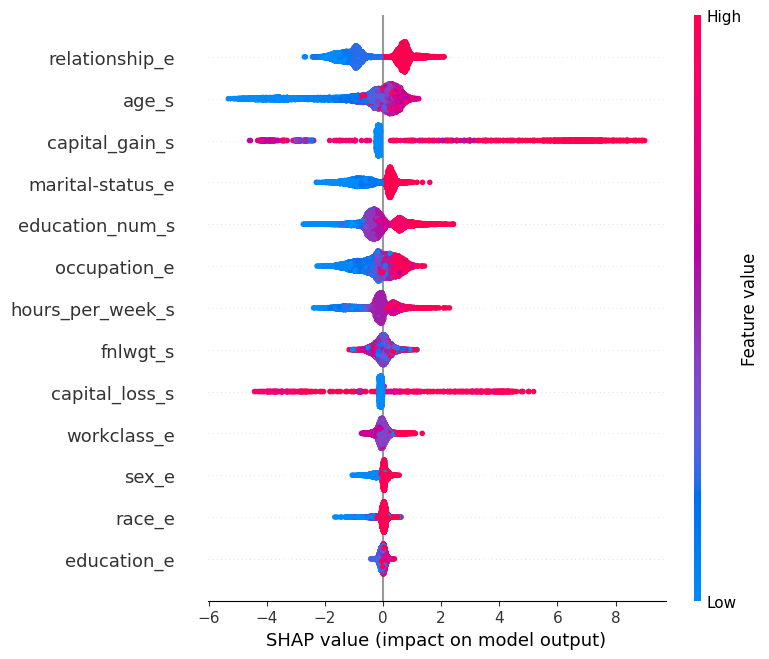

In [77]:
# Assuming you have a trained XGBoost model named xgb_model1 and your input data is in X_test
# Make sure your X_test is a pandas DataFrame or a NumPy array

# Create a SHAP explainer using the XGBoost model
explainer = shap.Explainer(xgb_lbl_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values = explainer.shap_values(X_test)

# Plot summary plot (summary_plot) to visualize feature importances
shap.summary_plot(shap_values, X_test, show = False)

In [78]:
# If you want to visualize the impact of a single prediction, you can use force_plot
# Select a specific instance (change the index accordingly)
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test.iloc[instance_index, :], show=False)